In [4]:
import pandas as pd

df = pd.read_csv("raw datasets/mmc2.csv", index_col=0)

cell_types_to_keep = [
    "preT.DN1.Th", "preT.DN2a.Th", "preT.DN2b.Th", "preT.DN3.Th",
    "T.DN4.Th", "T.ISP.Th", "T.DP.Th", "T.4.Th", "T.8.Th",
    "T.4.Nve.Sp", "T.4.Nve.Fem.Sp", "T.4.Sp.aCD3+CD40.18hr", "T.8.Nve.Sp",
    "Treg.4.25hi.Sp", "Treg.4.FP3+.Nrplo.Co",
    "T8.TN.P14.Sp", "T8.TE.LCMV.d7.Sp", "T8.MP.LCMV.d7.Sp", "T8.IEL.LCMV.d7.Gut",
    "T8.Tcm.LCMV.d180.Sp", "T8.Tem.LCMV.d180.Sp",
    "NKT.Sp", "NKT.Sp.LPS.3hr", "NKT.Sp.LPS.18hr", "NKT.Sp.LPS.3d",
    "LTHSC.34-.BM", "LTHSC.34+.BM", "STHSC.150-.BM", "MPP4.135+.BM"
]

filtered_df = df[cell_types_to_keep]
filtered_df.to_csv("filtered_abT_Tact_Stem.csv")
print("Filtered shape:", filtered_df.shape)

Filtered shape: (17535, 29)


In [5]:
filtered_df.head()

,preT.DN1.Th,preT.DN2a.Th,preT.DN2b.Th,preT.DN3.Th,T.DN4.Th,T.ISP.Th,T.DP.Th,T.4.Th,T.8.Th,T.4.Nve.Sp,...,T8.Tcm.LCMV.d180.Sp,T8.Tem.LCMV.d180.Sp,NKT.Sp,NKT.Sp.LPS.3hr,NKT.Sp.LPS.18hr,NKT.Sp.LPS.3d,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM
0610005C13Rik,1.022363,1.389747,1.024819,1.024482,1.026430,1.026217,3.010920,1.024462,1.024819,2.726341,...,1.025833,1.024819,1.385805,1.025833,1.575395,1.024819,1.096732,1.096732,1.021750,1.021812
0610007P14Rik,162.641117,206.945221,209.187788,198.421365,215.056475,225.565360,73.904647,138.841383,139.863904,168.924363,...,206.241084,205.309922,165.690720,133.234920,127.894194,195.147548,206.053987,246.105317,192.424636,204.298358
0610009B22Rik,68.070719,82.468806,89.769337,57.661619,76.399214,84.671456,32.828651,27.207241,36.169759,32.753248,...,36.105700,34.348965,25.168975,33.305724,29.284365,33.322384,78.272059,78.837030,68.844751,76.418169
0610009L18Rik,15.450717,13.573968,14.427620,8.249482,1.683173,4.001953,5.595954,6.367369,6.505833,8.262234,...,8.645607,7.268431,3.840215,1.025833,6.283540,12.791348,8.577159,16.791386,15.511549,16.947354
0610009O20Rik,160.246297,125.475307,155.928005,120.692893,118.433597,149.630866,92.040668,76.781112,87.529814,86.523573,...,87.608325,56.128251,109.175415,91.992319,102.035627,108.414405,168.645852,157.926022,155.941641,186.261464


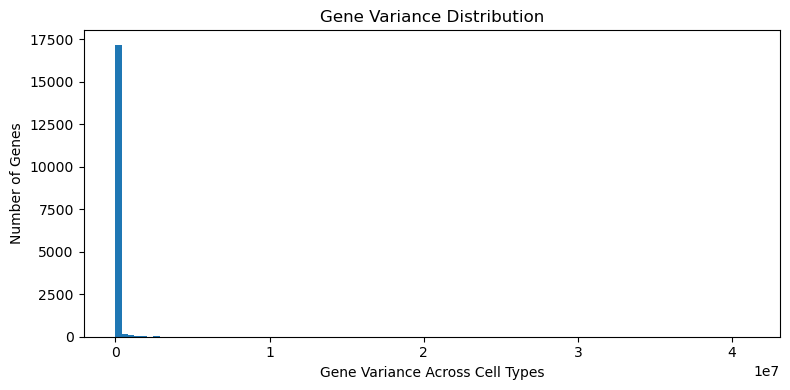

count    1.753500e+04
mean     5.970756e+04
std      6.481425e+05
min      3.050157e-06
25%      3.211117e+00
50%      4.267316e+02
75%      4.783711e+03
max      4.104707e+07
dtype: float64

In [6]:
import matplotlib.pyplot as plt

# Calculate variance for each gene across the 29 cell types
gene_variances = filtered_df.var(axis=1)

# Plot histogram
plt.figure(figsize=(8, 4))
plt.hist(gene_variances, bins=100)
plt.xlabel("Gene Variance Across Cell Types")
plt.ylabel("Number of Genes")
plt.title("Gene Variance Distribution")
plt.tight_layout()
plt.show()

# Optional: Look at exact stats
gene_variances.describe()


In [7]:
# Filter genes by variance threshold
var_threshold = 500
high_var_genes = gene_variances[gene_variances > var_threshold].index
refined_df = filtered_df.loc[high_var_genes]

print(f"Original shape: {filtered_df.shape}")
print(f"After variance filtering: {refined_df.shape}")


Original shape: (17535, 29)
After variance filtering: (8494, 29)


In [8]:
from sklearn.preprocessing import StandardScaler

# Transpose: rows = samples (cell types), columns = features (genes)
transposed = refined_df.T

# Z-score scaling
scaler = StandardScaler()
transposed_scaled = scaler.fit_transform(transposed)

# (Optional) back to DataFrame with labels
transposed_scaled_df = pd.DataFrame(transposed_scaled, index=transposed.index, columns=transposed.columns)


In [9]:
transposed = refined_df.T
transposed.head()


,0610007P14Rik,0610009B22Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610012G03Rik,0610030E20Rik,1110004E09Rik,1110004F10Rik,1110008L16Rik,...,Zswim8,Zufsp,Zw10,Zwilch,Zwint,Zyg11b,Zyx,Zzef1,Zzz3,l7Rn6
preT.DN1.Th,162.641117,68.070719,160.246297,155.767862,146.959609,147.315383,110.833671,72.055933,749.822124,140.782792,...,75.250417,107.574881,196.329630,59.813775,412.930595,174.486586,1102.093601,145.971474,305.759992,165.105875
preT.DN2a.Th,206.945221,82.468806,125.475307,273.998186,166.023337,146.009167,137.259987,72.322612,804.531997,119.763309,...,52.010176,86.629482,213.695086,92.412375,440.133238,133.170236,727.291384,154.743640,260.956800,211.656296
preT.DN2b.Th,209.187788,89.769337,155.928005,154.269870,245.243593,161.827642,124.749368,82.909098,802.684643,85.457918,...,63.935259,80.287351,226.407453,122.999419,364.562447,166.528710,399.395780,132.590213,249.726900,202.104434
preT.DN3.Th,198.421365,57.661619,120.692893,129.834226,225.662176,187.582633,178.268286,145.793925,817.759773,79.469101,...,62.974653,86.365967,262.319019,100.864308,384.143310,164.850226,248.382338,150.298107,291.366650,185.255146
T.DN4.Th,215.056475,76.399214,118.433597,197.843435,252.196726,153.613650,152.467579,182.459917,957.467722,89.810155,...,44.574791,81.943980,305.814673,144.660778,362.089698,146.115393,142.239852,132.912133,274.503519,242.887242


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
transposed_scaled = scaler.fit_transform(transposed)


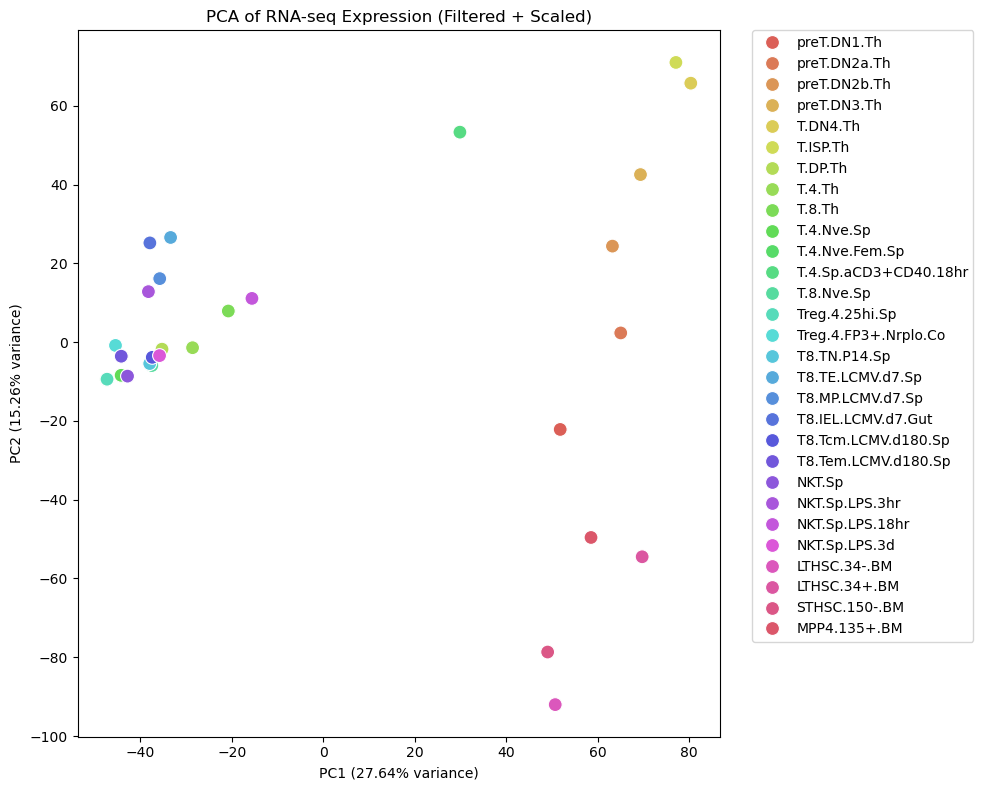

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Run PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(transposed_scaled)

# Build PCA DataFrame
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=transposed.index)
pca_df["CellType"] = pca_df.index  # Make sure cell types are in a column

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=pca_df,
    x="PC1", y="PC2",
    hue="CellType",
    palette=sns.color_palette("hls", n_colors=pca_df["CellType"].nunique()),
    s=100
)

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.title("PCA of RNA-seq Expression (Filtered + Scaled)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

In [12]:
pca_df  # but this will print the full table


,PC1,PC2,CellType
preT.DN1.Th,51.812371,-22.163609,preT.DN1.Th
preT.DN2a.Th,65.049692,2.336481,preT.DN2a.Th
preT.DN2b.Th,63.233074,24.380450,preT.DN2b.Th
preT.DN3.Th,69.364338,42.544820,preT.DN3.Th
T.DN4.Th,80.363870,65.748444,T.DN4.Th
T.ISP.Th,77.111275,71.012310,T.ISP.Th
T.DP.Th,-35.234807,-1.781570,T.DP.Th
T.4.Th,-28.557515,-1.410195,T.4.Th
T.8.Th,-20.740881,7.905591,T.8.Th
T.4.Nve.Sp,-44.176999,-8.418209,T.4.Nve.Sp


Going to compare it to Kalinas now 

First renaming some of my things so it doesnt get mixed up 

In [13]:

# Use the already scaled data
rna_transposed = transposed_scaled_df  # instead of refined_df.T

rna_pca = PCA(n_components=2)
rna_pca_result = rna_pca.fit_transform(rna_transposed)

rna_pca_df = pd.DataFrame(rna_pca_result, columns=["PC1", "PC2"], index=rna_transposed.index)
rna_pca_df["CellType"] = rna_pca_df.index



In [14]:
transposed_scaled_df.mean().mean(), transposed_scaled_df.std().mean()


(np.float64(1.8413116817883074e-17), np.float64(1.0177004891982149))

c:\Users\kalin_p\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


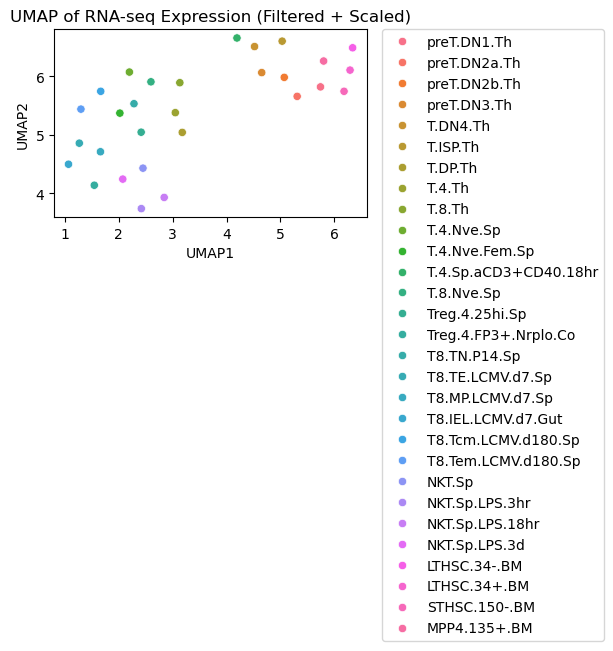

In [15]:
import umap.umap_ as umap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Run UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(transposed_scaled)

# Make a DataFrame
umap_df = pd.DataFrame(umap_result, columns=["UMAP1", "UMAP2"], index=refined_df.columns)
umap_df["CellType"] = umap_df.index

# Plot
umap_df = umap_df.reset_index(drop=True)
sns.scatterplot(data=umap_df, x="UMAP1", y="UMAP2", hue="CellType")
plt.title("UMAP of RNA-seq Expression (Filtered + Scaled)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)
plt.tight_layout()
plt.show()


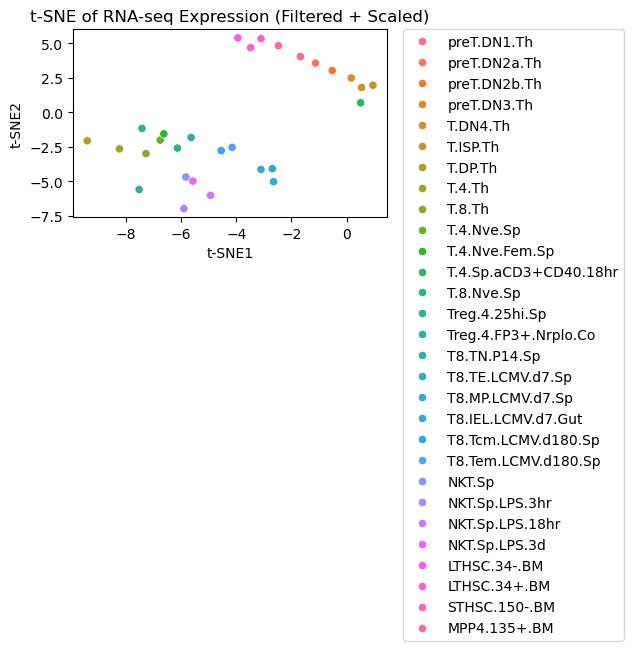

In [16]:
from sklearn.manifold import TSNE

# Run t-SNE
tsne_model = TSNE(n_components=2, random_state=42, perplexity=10)
tsne_result = tsne_model.fit_transform(transposed_scaled)

# Make a DataFrame
tsne_df = pd.DataFrame(tsne_result, columns=["t-SNE1", "t-SNE2"], index=refined_df.columns)
tsne_df["CellType"] = tsne_df.index

# Plot
tsne_df = tsne_df.reset_index(drop=True)
sns.scatterplot(data=tsne_df, x="t-SNE1", y="t-SNE2", hue="CellType")
plt.title("t-SNE of RNA-seq Expression (Filtered + Scaled)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)
plt.tight_layout()
plt.show()


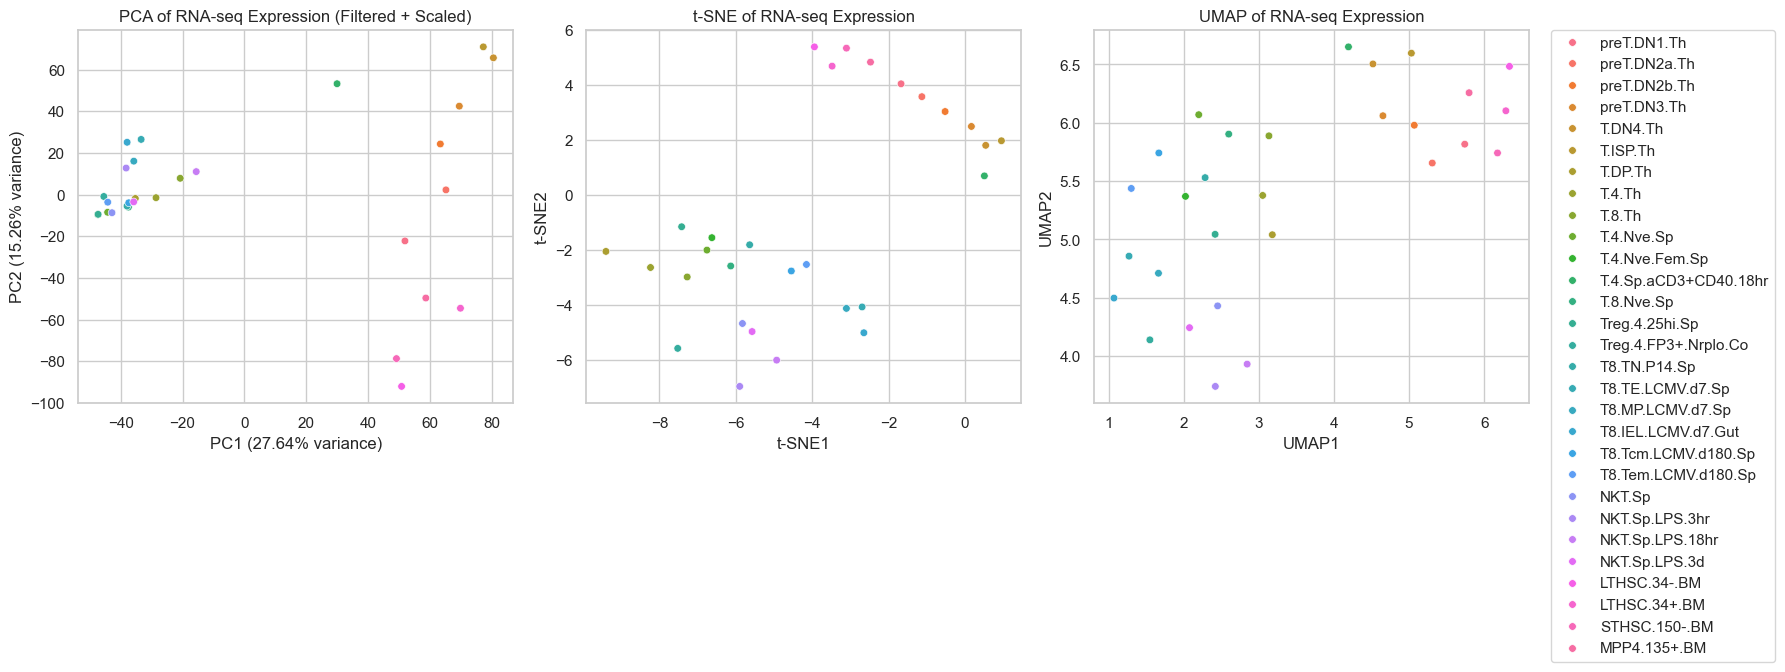

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create figure with 1 row and 3 plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- PCA ---
sns.scatterplot(
    data=pca_df,
    x="PC1", y="PC2",
    hue="CellType", s=30,
    ax=axes[0], legend=False
)
axes[0].set_title("PCA of RNA-seq Expression (Filtered + Scaled)")
axes[0].set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
axes[0].set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")

# --- t-SNE ---
sns.scatterplot(
    data=tsne_df,
    x="t-SNE1", y="t-SNE2",
    hue="CellType", s=30,
    ax=axes[1], legend=False
)
axes[1].set_title("t-SNE of RNA-seq Expression")
axes[1].set_xlabel("t-SNE1")
axes[1].set_ylabel("t-SNE2")

# --- UMAP ---
sns.scatterplot(
    data=umap_df,
    x="UMAP1", y="UMAP2",
    hue="CellType", s=30,
    ax=axes[2]
)
axes[2].set_title("UMAP of RNA-seq Expression")
axes[2].set_xlabel("UMAP1")
axes[2].set_ylabel("UMAP2")

# Move legend to the right of UMAP plot
axes[2].legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)

# Final layout
plt.tight_layout()
plt.show()


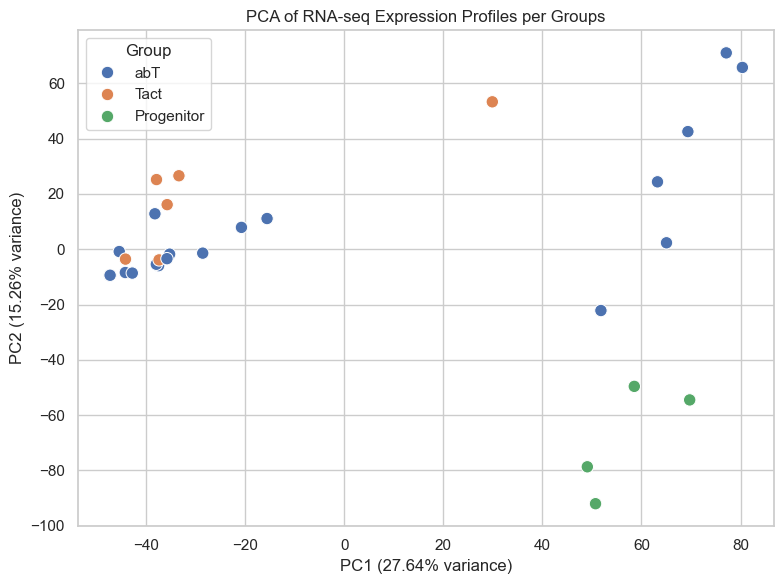

In [18]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# You already have: transposed_scaled
pca = PCA(n_components=2)
pca_result = pca.fit_transform(transposed_scaled)

# Create PCA DataFrame
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=refined_df.columns)

# Define cell type groups
abT_cells = [
    "preT.DN1.Th", "preT.DN2a.Th", "preT.DN2b.Th", "preT.DN3.Th", "T.DN4.Th", "T.ISP.Th", "T.DP.Th", "T.4.Th", "T.8.Th",
    "T.4.Nve.Sp", "T.4.Nve.Fem.Sp", "T.8.Nve.Sp", "Treg.4.25hi.Sp", "Treg.4.FP3+.Nrplo.Co", "T8.TN.P14.Sp", "NKT.Sp",
    "NKT.Sp.LPS.3hr", "NKT.Sp.LPS.18hr", "NKT.Sp.LPS.3d"
]

tact_cells = [
    "T.4.Sp.aCD3+CD40.18hr", "T8.TE.LCMV.d7.Sp", "T8.MP.LCMV.d7.Sp", "T8.IEL.LCMV.d7.Gut",
    "T8.Tcm.LCMV.d180.Sp", "T8.Tem.LCMV.d180.Sp"
]

stem_cells = [
    "LTHSC.34-.BM", "LTHSC.34+.BM", "STHSC.150-.BM", "MPP4.135+.BM"
]

# Map cell types to groups
group_map = {}
for sample in abT_cells:
    group_map[sample] = "abT"
for sample in tact_cells:
    group_map[sample] = "Tact"
for sample in stem_cells:
    group_map[sample] = "Progenitor"

# Add group labels
pca_df["Group"] = pca_df.index.map(lambda name: group_map.get(name, "Other"))

# Plot PCA by group
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Group", s=80)
plt.title("PCA of RNA-seq Expression Profiles per Groups")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.tight_layout()
plt.show()


c:\Users\kalin_p\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


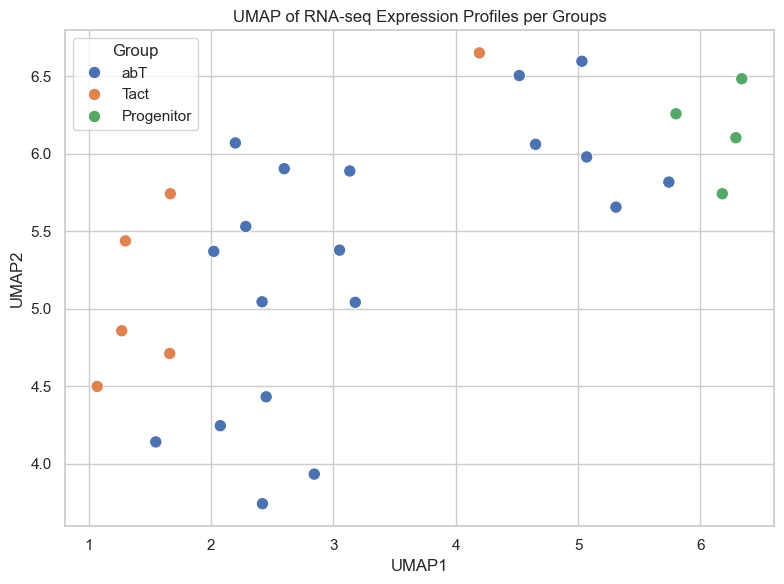

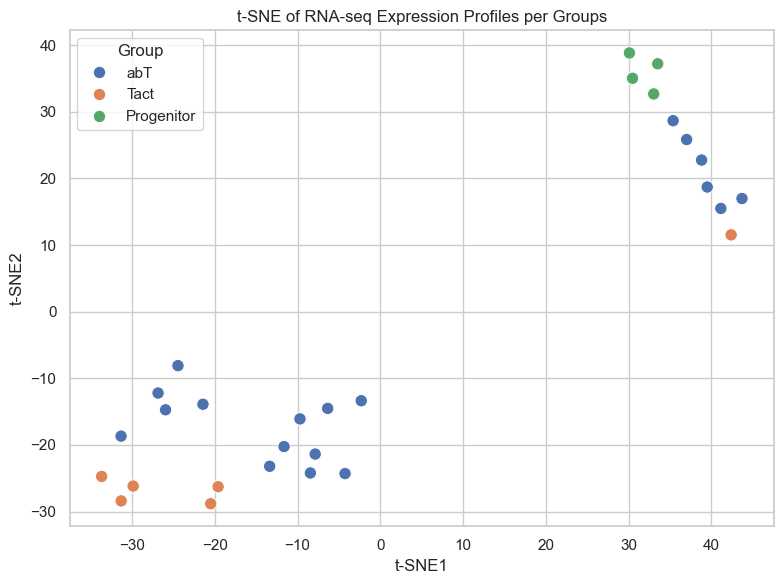

In [19]:
from umap import UMAP
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Run UMAP and t-SNE on transposed_scaled
umap_result = UMAP(n_components=2, random_state=42).fit_transform(transposed_scaled)
tsne_result = TSNE(n_components=2, perplexity=5, random_state=42).fit_transform(transposed_scaled)

# Add results to your pca_df (which already has Group info)
pca_df[["UMAP1", "UMAP2"]] = umap_result
pca_df[["tSNE1", "tSNE2"]] = tsne_result

# Plot UMAP
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="UMAP1", y="UMAP2", hue="Group", s=80)
plt.title("UMAP of RNA-seq Expression Profiles per Groups")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.tight_layout()
plt.show()

# Plot t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="tSNE1", y="tSNE2", hue="Group", s=80)
plt.title("t-SNE of RNA-seq Expression Profiles per Groups")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.tight_layout()
plt.show()


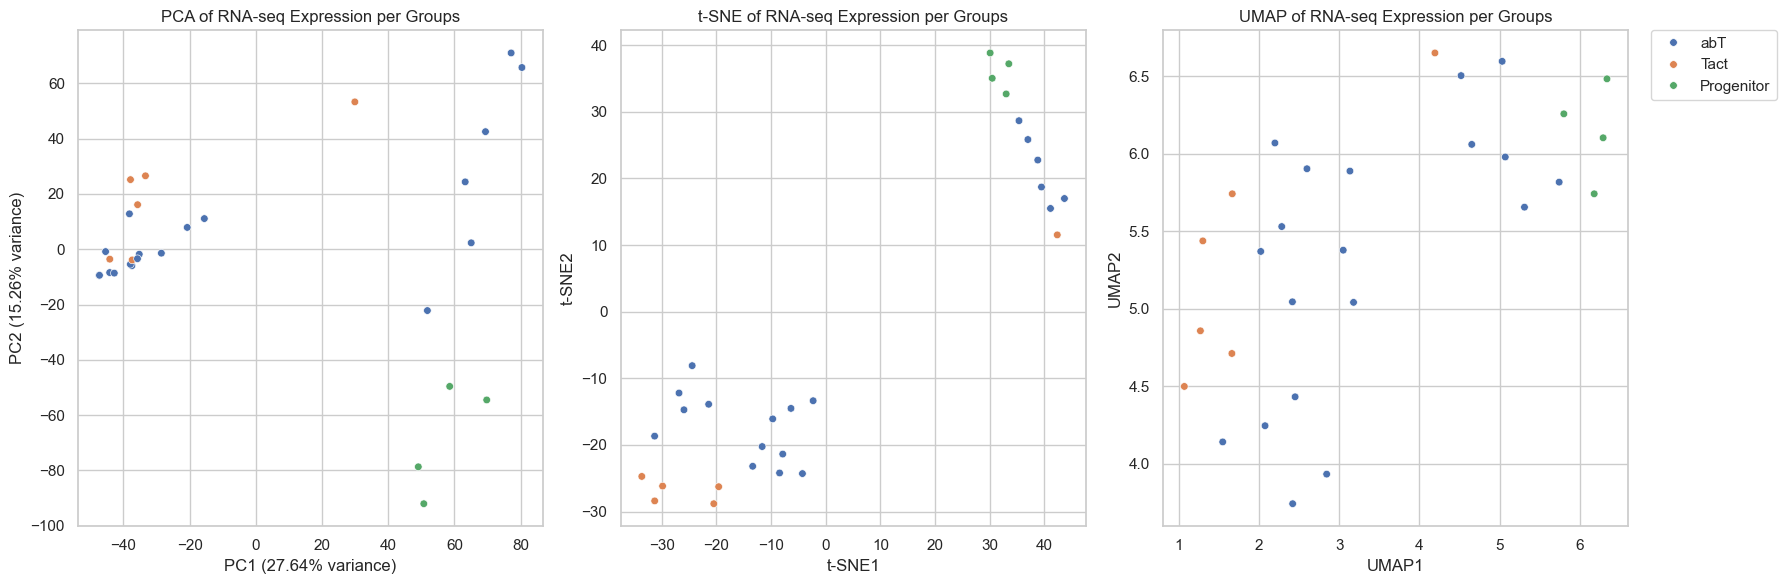

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# PCA plot
sns.scatterplot(
    data=pca_df, x="PC1", y="PC2", hue="Group", s=30, ax=axes[0], legend=False
)
axes[0].set_title("PCA of RNA-seq Expression per Groups")
axes[0].set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
axes[0].set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")

# t-SNE plot
sns.scatterplot(
    data=pca_df, x="tSNE1", y="tSNE2", hue="Group", s=30, ax=axes[1], legend=False
)
axes[1].set_title("t-SNE of RNA-seq Expression per Groups")
axes[1].set_xlabel("t-SNE1")
axes[1].set_ylabel("t-SNE2")

# UMAP plot
sns.scatterplot(
    data=pca_df, x="UMAP1", y="UMAP2", hue="Group", s=30, ax=axes[2]
)
axes[2].set_title("UMAP of RNA-seq Expression per Groups")
axes[2].set_xlabel("UMAP1")
axes[2].set_ylabel("UMAP2")

# Place legend outside last plot
axes[2].legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)

# Final layout
plt.tight_layout()
plt.show()


I am going to add kalinas work to be able to compare them 

Now task 2.ii) 

In [21]:
print(refined_df.shape)
refined_df.head()



(8494, 29)


,preT.DN1.Th,preT.DN2a.Th,preT.DN2b.Th,preT.DN3.Th,T.DN4.Th,T.ISP.Th,T.DP.Th,T.4.Th,T.8.Th,T.4.Nve.Sp,...,T8.Tcm.LCMV.d180.Sp,T8.Tem.LCMV.d180.Sp,NKT.Sp,NKT.Sp.LPS.3hr,NKT.Sp.LPS.18hr,NKT.Sp.LPS.3d,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM
0610007P14Rik,162.641117,206.945221,209.187788,198.421365,215.056475,225.565360,73.904647,138.841383,139.863904,168.924363,...,206.241084,205.309922,165.690720,133.234920,127.894194,195.147548,206.053987,246.105317,192.424636,204.298358
0610009B22Rik,68.070719,82.468806,89.769337,57.661619,76.399214,84.671456,32.828651,27.207241,36.169759,32.753248,...,36.105700,34.348965,25.168975,33.305724,29.284365,33.322384,78.272059,78.837030,68.844751,76.418169
0610009O20Rik,160.246297,125.475307,155.928005,120.692893,118.433597,149.630866,92.040668,76.781112,87.529814,86.523573,...,87.608325,56.128251,109.175415,91.992319,102.035627,108.414405,168.645852,157.926022,155.941641,186.261464
0610010F05Rik,155.767862,273.998186,154.269870,129.834226,197.843435,173.726109,58.203391,42.950719,26.099208,40.183229,...,29.771841,71.347412,35.723998,11.660369,27.574347,54.965951,75.934142,172.175681,119.156447,174.554003
0610010K14Rik,146.959609,166.023337,245.243593,225.662176,252.196726,245.295957,84.157303,204.219996,198.168772,199.553377,...,184.547689,175.993310,110.913976,137.817664,132.083765,123.633828,149.566205,201.786082,155.028950,160.824830


In [22]:
from sklearn.preprocessing import StandardScaler

# Standardize across rows (i.e. for each gene)
scaler = StandardScaler()
row_scaled = scaler.fit_transform(refined_df.T).T  # Transpose -> scale -> transpose back

# Create a new DataFrame with same index/columns
row_scaled_df = pd.DataFrame(row_scaled, index=refined_df.index, columns=refined_df.columns)

# Check result
row_scaled_df.head()


,preT.DN1.Th,preT.DN2a.Th,preT.DN2b.Th,preT.DN3.Th,T.DN4.Th,T.ISP.Th,T.DP.Th,T.4.Th,T.8.Th,T.4.Nve.Sp,...,T8.Tcm.LCMV.d180.Sp,T8.Tem.LCMV.d180.Sp,NKT.Sp,NKT.Sp.LPS.3hr,NKT.Sp.LPS.18hr,NKT.Sp.LPS.3d,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM
0610007P14Rik,-0.532894,0.416132,0.464170,0.233545,0.589881,0.814989,-2.433693,-1.042701,-1.020798,-0.398302,...,0.401049,0.381103,-0.467569,-1.162795,-1.277198,0.163418,0.397041,1.254970,0.105091,0.359435
0610009B22Rik,0.822623,1.427842,1.734718,0.385080,1.172709,1.520430,-0.658766,-0.895060,-0.518324,-0.661936,...,-0.521017,-0.594860,-0.980738,-0.638713,-0.807749,-0.638012,1.251433,1.275182,0.855159,1.173505
0610009O20Rik,1.418314,0.331641,1.283357,0.182180,0.111572,1.086558,-0.713267,-1.190163,-0.854242,-0.885689,...,-0.851788,-1.835612,-0.177767,-0.714778,-0.400902,-0.201551,1.680819,1.345800,1.283784,2.231347
0610010F05Rik,1.099021,2.896547,1.076246,0.704736,1.738721,1.372051,-0.384310,-0.616206,-0.872409,-0.658282,...,-0.816572,-0.184474,-0.726078,-1.091932,-0.849982,-0.433531,-0.114739,1.348479,0.542396,1.384638
0610010K14Rik,-0.785941,-0.334382,1.542094,1.078273,1.706792,1.543335,-2.273527,0.570376,0.427042,0.459838,...,0.104401,-0.098225,-1.639747,-1.002484,-1.138302,-1.338454,-0.724199,0.512724,-0.594804,-0.457518


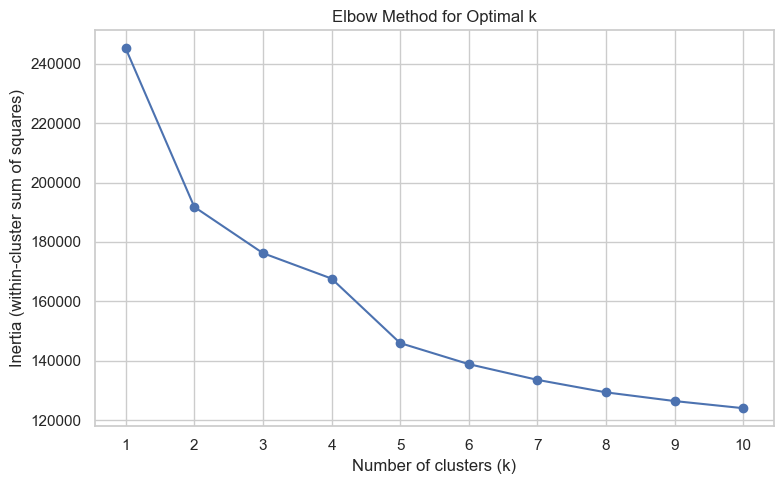

In [25]:
# K-means clustering on genes
# Defining k-mean clusters using elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K_range = range(1, 11)  # test 1 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(row_scaled_df)  
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()


Based on the graph, we are defining k=5.

c:\Users\kalin_p\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


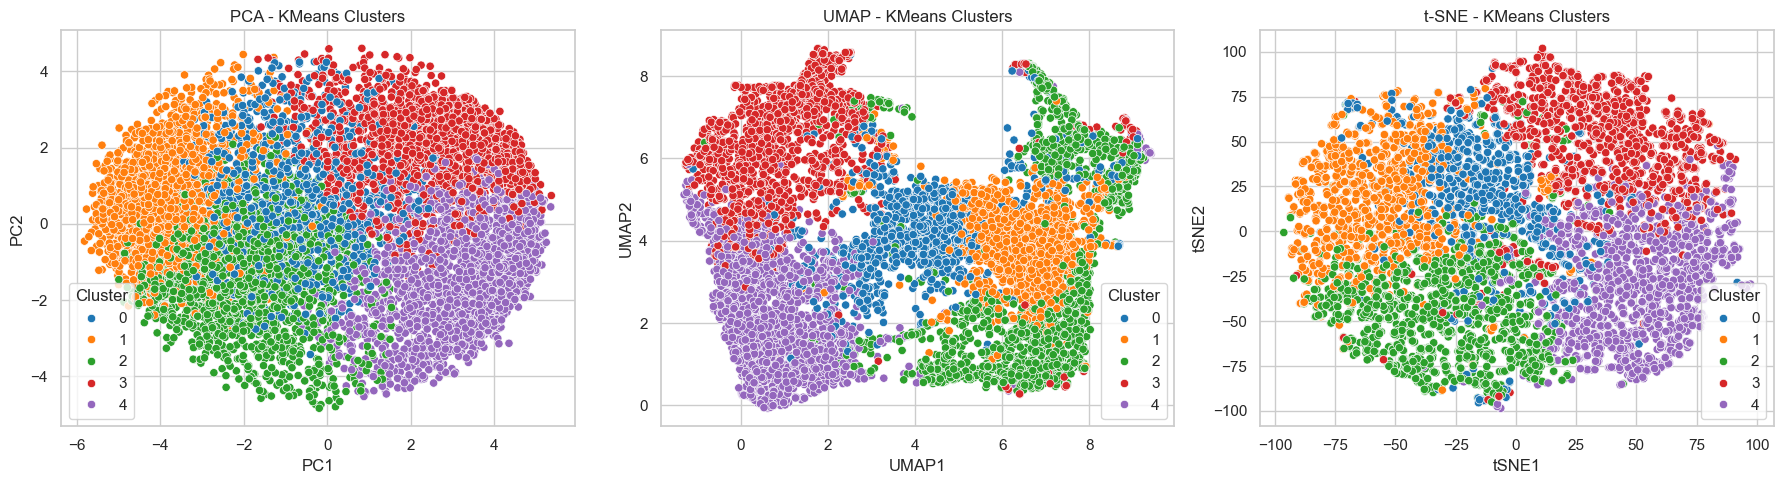

In [26]:
# Run k-means clustering
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from umap import UMAP 
from sklearn.preprocessing import StandardScaler

# Standardizing features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(row_scaled_df)

# Running KMeans clustering 
kmeans = KMeans(n_clusters=5, random_state=42) 
cluster_labels = kmeans.fit_predict(scaled_data)

# Adding cluster labels to DataFrame
cluster_df = pd.DataFrame(scaled_data, index=row_scaled_df.index)
cluster_df["Cluster"] = cluster_labels
cluster_df["Group"] = pca_df["Group"]  

# PCA
pca = PCA(n_components=2)
cluster_df[["PC1", "PC2"]] = pca.fit_transform(scaled_data)

# UMAP
umap_result = UMAP(n_components=2, random_state=42).fit_transform(scaled_data)
cluster_df[["UMAP1", "UMAP2"]] = umap_result

# t-SNE
tsne_result = TSNE(n_components=2, perplexity=5, random_state=42).fit_transform(scaled_data)
cluster_df[["tSNE1", "tSNE2"]] = tsne_result

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=cluster_df, x="PC1", y="PC2", hue="Cluster", palette="tab10", ax=axes[0])
axes[0].set_title("PCA - KMeans Clusters")

sns.scatterplot(data=cluster_df, x="UMAP1", y="UMAP2", hue="Cluster", palette="tab10", ax=axes[1])
axes[1].set_title("UMAP - KMeans Clusters")

sns.scatterplot(data=cluster_df, x="tSNE1", y="tSNE2", hue="Cluster", palette="tab10", ax=axes[2])
axes[2].set_title("t-SNE - KMeans Clusters")

plt.tight_layout()
plt.show()


In [27]:
cluster_df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,Cluster,Group,PC1,PC2,UMAP1,UMAP2,tSNE1,tSNE2
0610007P14Rik,-0.589972,0.431706,0.488999,0.143681,0.378329,0.547202,-1.725235,-1.161338,-1.491318,-0.494119,...,0.070556,0.368606,4,NaN,2.005389,-2.379345,3.739681,0.765618,9.604010,-82.994553
0610009B22Rik,0.964656,1.527228,1.855173,0.292078,0.873525,1.128808,-0.548024,-0.995898,-0.696582,-0.827575,...,0.768384,1.202376,4,NaN,5.004460,-0.434155,-0.637933,2.596470,91.674576,-14.195685
0610009O20Rik,1.647848,0.340216,1.369842,0.093380,-0.028064,0.771099,-0.584172,-1.326579,-1.227886,-1.110589,...,1.167155,2.285814,3,NaN,4.342743,1.164117,-0.077603,5.254172,77.519966,13.968493
0610010F05Rik,1.281654,3.117604,1.147142,0.605115,1.354434,1.006476,-0.365992,-0.683423,-1.256620,-0.822953,...,0.477404,1.418617,4,NaN,4.682487,0.125331,-0.572638,4.202839,89.209473,2.455684
0610010K14Rik,-0.880189,-0.380982,1.648052,0.970917,1.327306,1.147692,-1.619007,0.646217,0.798651,0.591296,...,-0.580591,-0.468114,4,NaN,1.171907,-2.630124,1.548237,0.638577,33.599251,-52.991222


In [28]:
# Saving gene clusters for Bobby
df_trimmed = df.iloc[:, :-7]         # all columns except the last 7
df_trimmed.to_csv("gene_clusters_for_GO.csv")
